# EDA On Clinical Trials

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from dateutil.relativedelta import relativedelta
import datetime
import math

In [2]:
train=pd.read_csv('trials.csv',na_values='null')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
train.head(3)

,Rank,NCT Number,Title,Recruitment,Study Results,Conditions,Interventions,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Types,Study Designs,Other IDs,First Received,Start Date,Completion Date,Last Updated,Last Verified,Results First Received,Acronym,Primary Completion Date,Outcome Measures,URL
0,1,NCT01638533,"Romidepsin in Treating Patients With Lymphoma,...",Recruiting,No Results Available,Adult Mixed Glioma|Adult Pineal Gland Astrocyt...,Other: Pharmacological Study|Drug: Romidepsin,National Cancer Institute (NCI)|Celgene Corpor...,Both,"18 Years and older (Adult, Senior)",Phase 1,132.0,NIH|Industry,Interventional,Endpoint Classification: Safety Study|Interven...,NCI-2012-01040|NA_00052587|NCI-2013-01545|CDR0...,9-Jul-12,Jun-12,NaN,19-Jul-16,Apr-16,No Study Results Posted,NaN,Sep-17,Dose-limiting toxicity of romidepsin in groups...,https://ClinicalTrials.gov/show/NCT01638533
1,2,NCT01460134,A Study of CDX-1127 (Varlilumab) in Patients W...,"Active, not recruiting",No Results Available,"CD27 Expressing B-cell Malignancies, (for Exam...",Drug: CDX-1127|Drug: CDX-1127|Drug: CDX-1127,Celldex Therapeutics,Both,"18 Years and older (Adult, Senior)",Phase 1,90.0,Industry,Interventional,Allocation: Non-Randomized|Endpoint Classifica...,CDX1127-01,12-Oct-11,Oct-11,Dec-16,5-Apr-16,Apr-16,No Study Results Posted,NaN,Dec-15,Characterize the adverse events associated wit...,https://ClinicalTrials.gov/show/NCT01460134
2,3,NCT01660776,BMS_PD-L1_onco : Assessment of the PD-L1 Prote...,Recruiting,No Results Available,Diffuse Large B-cell Lymphoma|Hodgkin Lymphoma...,NaN,Rennes University Hospital|Roche Pharma AG|Nat...,Both,"18 Years to 75 Years (Adult, Senior)",NaN,325.0,Other|Industry,Observational,Observational Model: Case-Crossover|Time Persp...,2011-A01163-38|B111181-40|11/32-821,31-Jul-12,Jun-12,Jun-17,5-Jul-16,Jul-16,No Study Results Posted,BMS_PD-L1,Jun-17,Description of one or several blood cell types...,https://ClinicalTrials.gov/show/NCT01660776


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43962 entries, 0 to 43961
Data columns (total 26 columns):
Rank                       43962 non-null int64
NCT Number                 43962 non-null object
Title                      43962 non-null object
Recruitment                43962 non-null object
Study Results              43962 non-null object
Conditions                 43962 non-null object
Interventions              39709 non-null object
Sponsor/Collaborators      43962 non-null object
Gender                     43919 non-null object
Age                        43962 non-null object
Phases                     28460 non-null object
Enrollment                 43543 non-null float64
Funded Bys                 43962 non-null object
Study Types                43962 non-null object
Study Designs              43444 non-null object
Other IDs                  43954 non-null object
First Received             43962 non-null object
Start Date                 43602 non-null object
Completio

In [6]:
train.isnull().sum()

Rank                           0
NCT Number                     0
Title                          0
Recruitment                    0
Study Results                  0
Conditions                     0
Interventions               4253
Sponsor/Collaborators          0
Gender                        43
Age                            0
Phases                     15502
Enrollment                   419
Funded Bys                     0
Study Types                    0
Study Designs                518
Other IDs                      8
First Received                 0
Start Date                   360
Completion Date             7097
Last Updated                   0
Last Verified                  0
Results First Received         0
Acronym                    33579
Primary Completion Date     1378
Outcome Measures            1101
URL                            0
dtype: int64

In [7]:
train.describe(include=['object'])

,NCT Number,Title,Recruitment,Study Results,Conditions,Interventions,Sponsor/Collaborators,Gender,Age,Phases,Funded Bys,Study Types,Study Designs,Other IDs,First Received,Start Date,Completion Date,Last Updated,Last Verified,Results First Received,Acronym,Primary Completion Date,Outcome Measures,URL
count,43962,43962,43962,43962,43962,39709,43962,43919,43962,28460,43962,43962,43444,43954,43962,43602,36865,43962,43962,43962,10383,42584,42861,43962
unique,43962,43894,12,2,18567,34002,15139,3,1252,7,36,3,1413,43712,3265,337,430,2785,157,1463,9438,429,41530,43962
top,NCT02644304,Phase 3 Study of KHK7580,Recruiting,No Results Available,Breast Cancer,Behavioral: Questionnaire,National Cancer Institute (NCI),Both,"18 Years and older (Adult, Senior)",Phase 2,Other,Interventional,Endpoint Classification: Safety/Efficacy Study...,1,9-May-09,Jan-15,Dec-16,1-Aug-16,Jul-16,No Study Results Posted,NSCLC,Dec-16,Number of Adverse Events,https://ClinicalTrials.gov/show/NCT01414517
freq,1,3,14915,40069,2184,66,748,34809,23363,11633,22592,35610,6297,29,208,511,1503,489,3107,40069,17,1755,81,1


###### What are the various types of Study?

In [8]:
train['Study Types'].unique()

array(['Interventional', 'Observational', 'Expanded Access'], dtype=object)

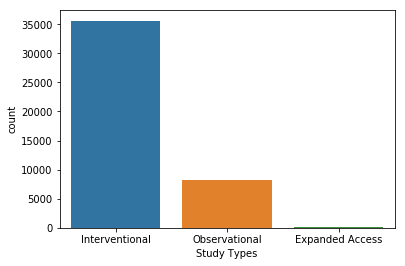

In [9]:
sns.countplot(train['Study Types'])

###### What are the different types of "Recruitment Status"?

In [10]:
Rec_Types=train.Recruitment.value_counts()

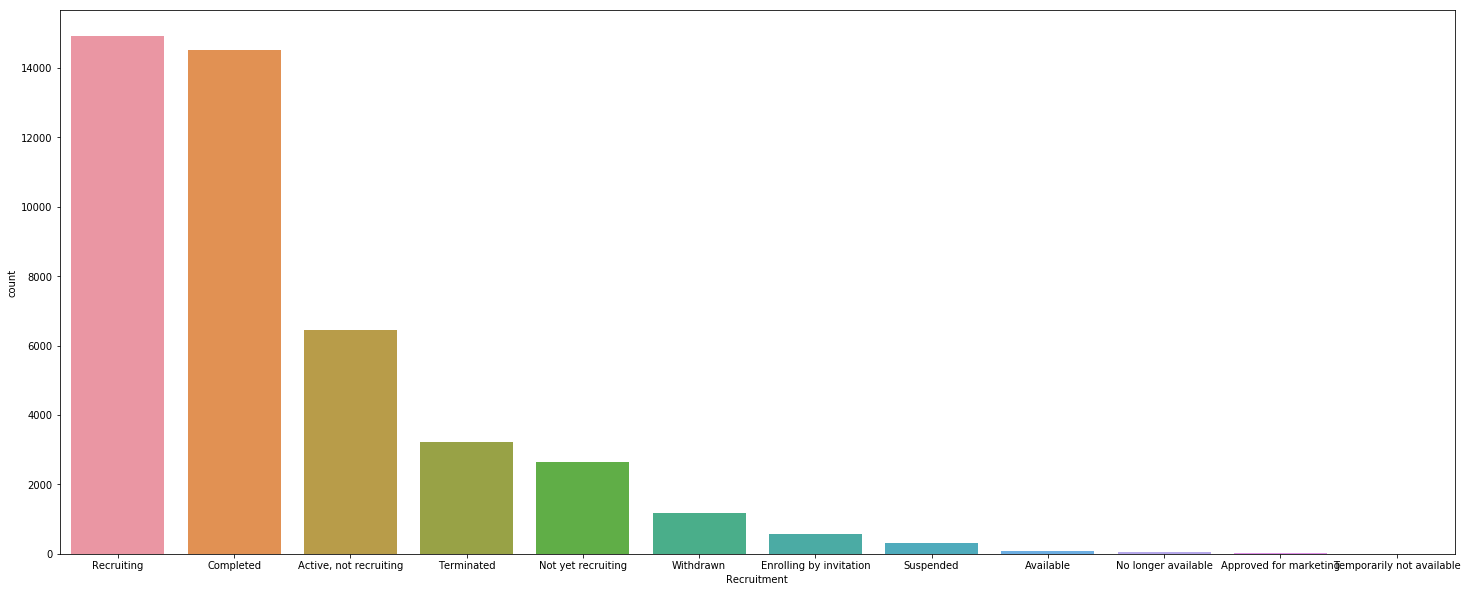

In [11]:
plt.figure(figsize=(25,10))
sns.countplot(train['Recruitment'],order=Rec_Types.index)

In [12]:
Rec_Types.index

Index(['Recruiting', 'Completed', 'Active, not recruiting', 'Terminated',
       'Not yet recruiting', 'Withdrawn', 'Enrolling by invitation',
       'Suspended', 'Available', 'No longer available',
       'Approved for marketing', 'Temporarily not available'],
      dtype='object')

###### Mapping of "Recruitment" into generalized categories 

Since, there are some "Recruitment Status" that can be treated as one, so we need to combine them into a generalised categories.

In [13]:
combine={
    'No longer available':'Terminated',
    'Withdrawn':'Terminated',
    'Approved for marketing':'Available',
    'Not yet recruiting':'Suspended',
    'Enrolling by invitation':'Recruiting',
    'Active, not recruiting':'Temporarily not available',
    'Completed':'Completed',
    'Terminated':'Terminated',
    'Suspended':'Suspended',
    'Available':'Available',
    'Recruiting':'Recruiting',
    'Temporarily not available':'Temporarily not available'
}
train['Recruitment']=train['Recruitment'].map(combine)

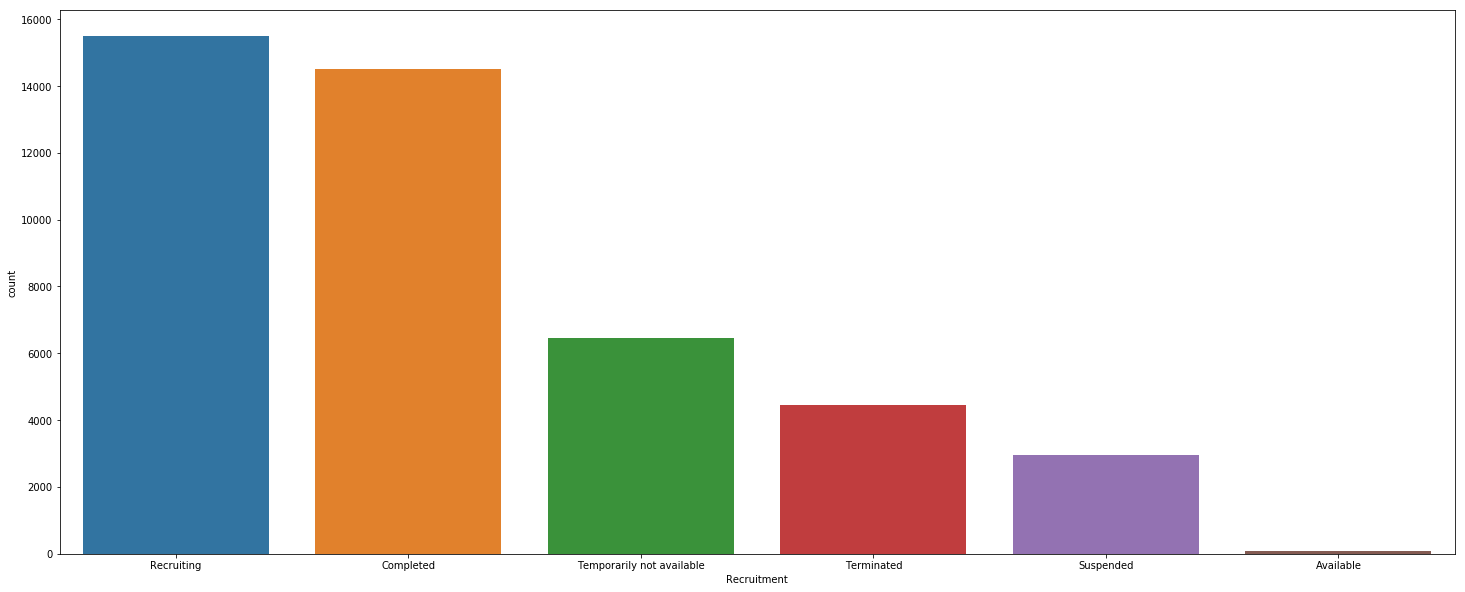

In [14]:
Rec_Types=train.Recruitment.value_counts()
plt.figure(figsize=(25,10))
sns.countplot(train['Recruitment'],order=Rec_Types.index)

###### What are the different "Interventions" types?

In [15]:
interventions=set()
for t in train.Interventions:
    if type(t)!=float:
        for a in t.split('|'):
            interventions.add(a.split(':')[0])

In [16]:
interventions

{'Behavioral',
 'Biological',
 'Device',
 'Dietary Supplement',
 'Drug',
 'Genetic',
 'Other',
 'Procedure',
 'Radiation'}

###### Which institutes has sponsered most trials?

In [17]:
institutes=[]
for sent in train['Sponsor/Collaborators']:
    for s in sent.split('|'):
        institutes.append(s)

In [18]:
l=[]
for ins in institutes:
    if ins.find('Institute')!=-1:
        l.append(ins)

In [19]:
data=pd.Series(l).value_counts()

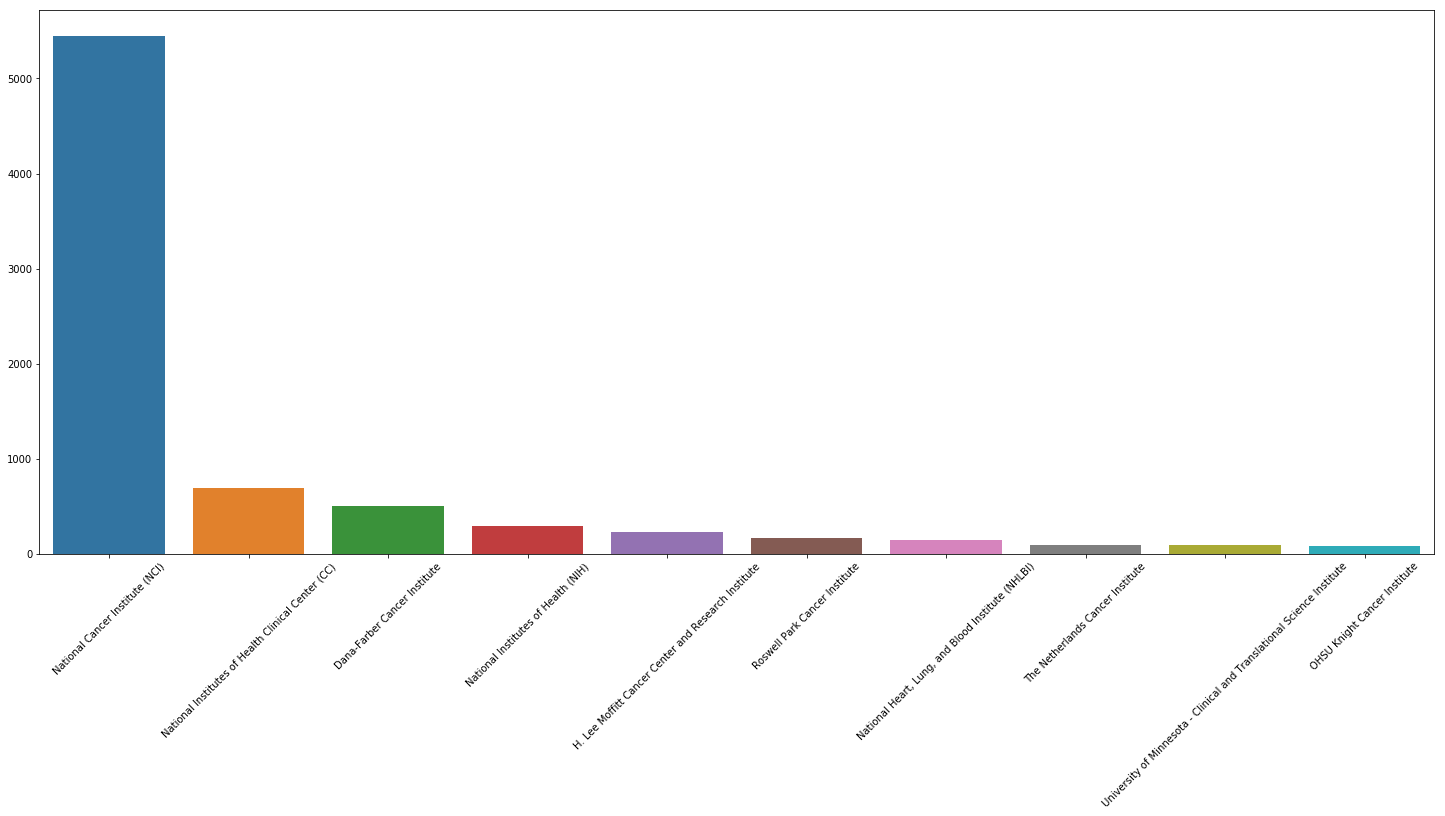

In [20]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=45)
sns.barplot(data.index[:10],data.values[:10])

"Study Results" distribution

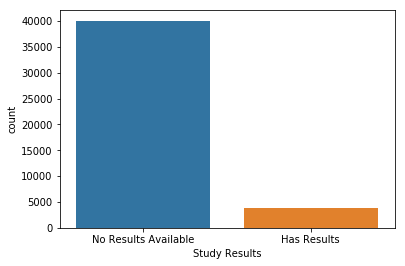

In [21]:
sns.countplot(train['Study Results'])

"Gender" distribution

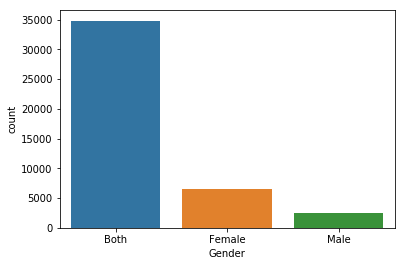

In [22]:
sns.countplot(train.Gender)

###### Feature Engineering on "Age" column

Extraxting Out the "Age categories" out of the "Age" column

In [23]:
age_categories=[]
for age in train.Age:
    l=age.split('(')
    age_categories.append(l[-1].split(')')[0])

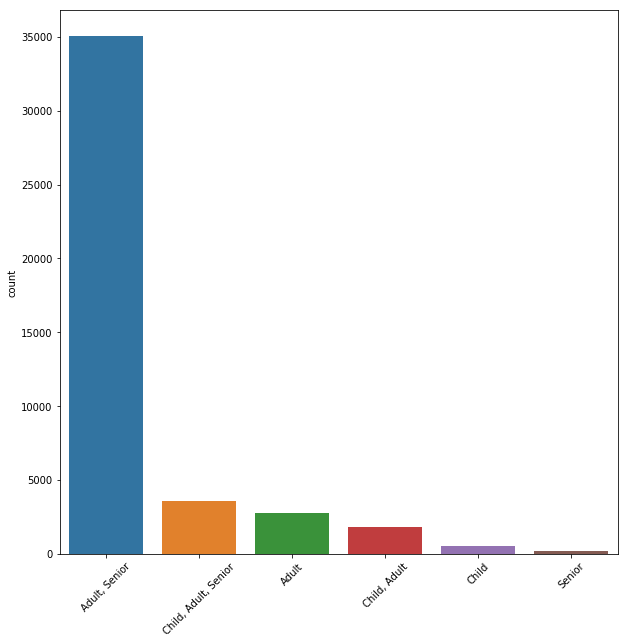

In [24]:
col_order=pd.Series(age_categories).value_counts().index
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(age_categories,order=col_order)
train['age_categories']=age_categories

Distribution of "Phases"

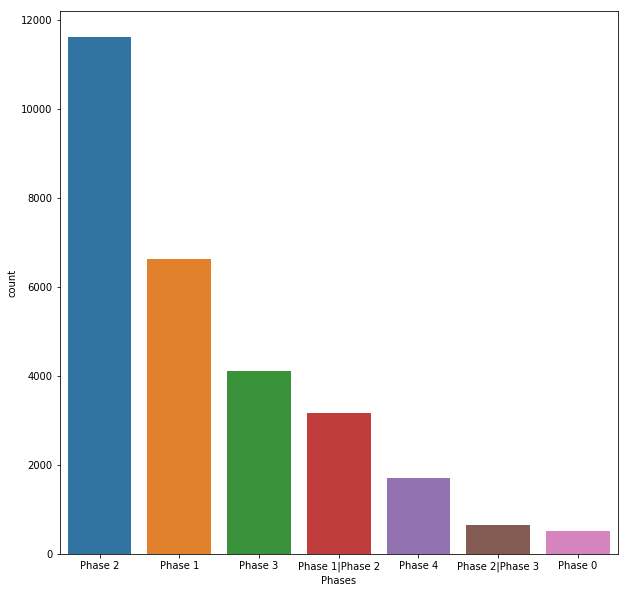

In [25]:
col=train.Phases.value_counts().index
plt.figure(figsize=(10,10))
sns.countplot(train.Phases,order=col)

 Feature Engineering for determining "Time Period" of a trial

In [26]:
days_taken=[]
time_taken=[]
for last,first,start,completion in zip(train['Last Updated'],train['First Received'],train['Start Date'],train['Completion Date']):
    if(type(start)==float):
        fir=datetime.datetime.strptime(first,'%d-%b-%y')
    else:
        fir=datetime.datetime.strptime(start,'%b-%y')
    if(type(completion)==float):
        sec=datetime.datetime.strptime(last,'%d-%b-%y')
    else:
        sec=datetime.datetime.strptime(completion,'%b-%y')
    days_taken.append((sec-fir).days)
    rdelta = relativedelta(sec, fir)
    time_taken.append(rdelta)

In [27]:
train['days_taken']=days_taken
train['time_taken']=time_taken

In [28]:
years=[]
for time in train['time_taken']:
    years.append(time.years)

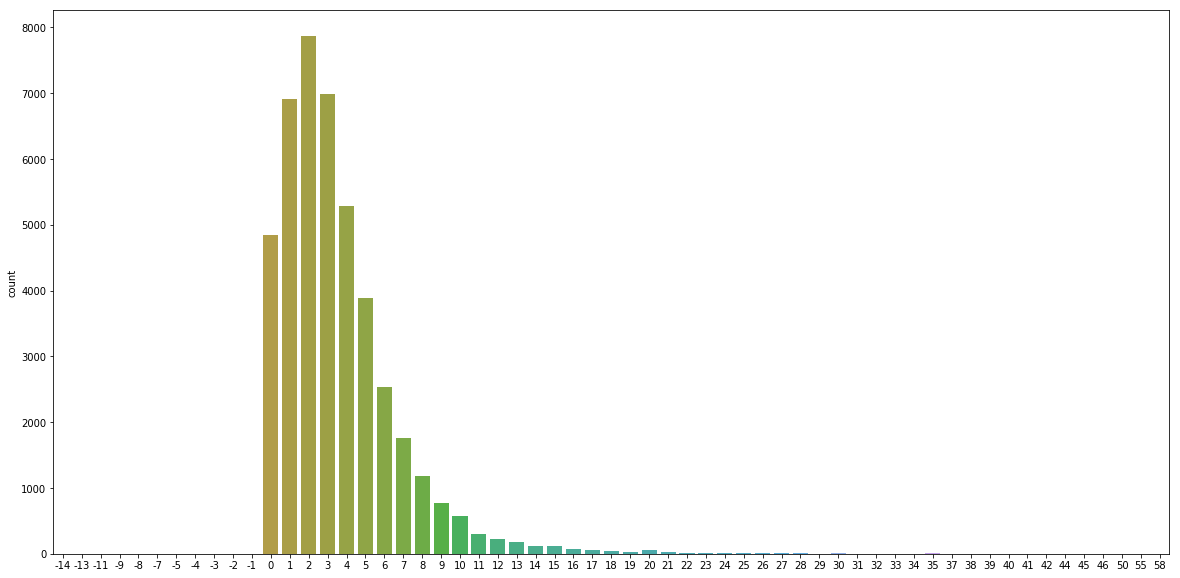

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(years)

Filling null values in "Enrollment" column

In [30]:
train['Enrollment'].fillna(train['Enrollment'].mode()[0],inplace=True)

"Funders" distribution

In [31]:
funders=[]
for orgs in train['Funded Bys']:
    for org in orgs.split('|'):
        funders.append(org)

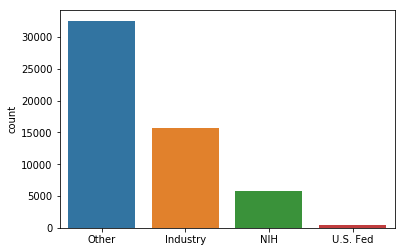

In [32]:
col=pd.Series(funders).value_counts().index
sns.countplot(funders,order=col)

"Study Designs" distribution

In [33]:
train['Study Designs'][0]

'Endpoint Classification: Safety Study|Intervention Model: Single Group Assignment|Masking: Open Label|Primary Purpose: Treatment'

In [34]:
features=[]
for studies in train['Study Designs']:
    if(type(studies)!=float):
        for study in studies.split('|'):
            features.append(study.split(':')[0])

In [35]:
diff_features=pd.Series(features).unique()

In [36]:
ano_dict=dict()
for feature in diff_features:
    b=np.empty(train.shape[0])
    b[:]=np.nan
    ano_dict[feature]=list(b)
for index in range(train.shape[0]):
    studies=train.iloc[index]['Study Designs']
    if(type(studies)!=float):
        for study in studies.split('|'):
            ano_dict[study.split(':')[0]][index]=(study.split(':')[1])

In [37]:
Study_Design_Data=pd.DataFrame(ano_dict)

"Endpoint Classifications" distribution

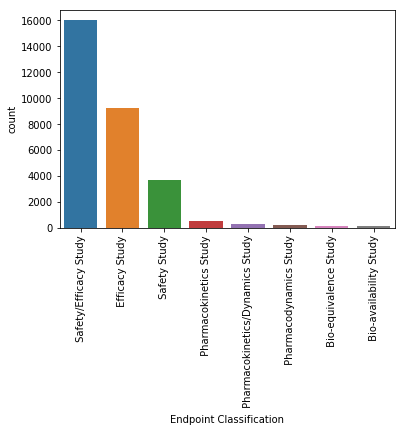

In [38]:
plt.xticks(rotation=90)
col=pd.Series(Study_Design_Data['Endpoint Classification']).value_counts().index
sns.countplot(Study_Design_Data['Endpoint Classification'],order=col)

In [39]:
train=train.join(Study_Design_Data)

###### What is the number of "Enrollments" in different ranges? 

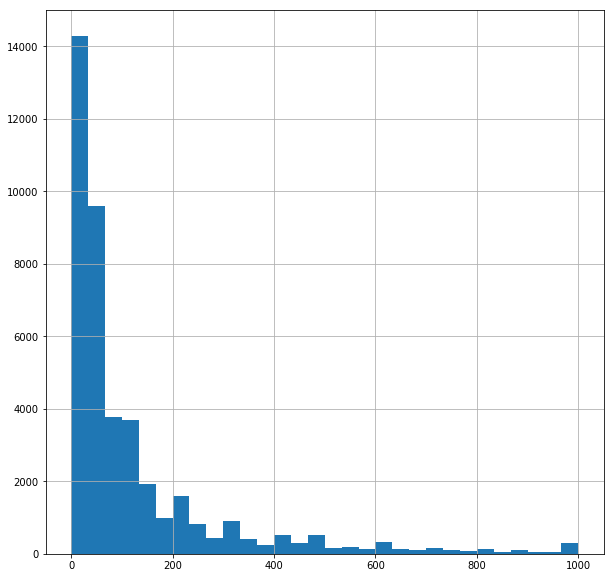

In [40]:
plt.figure(figsize=(10,10))
train.Enrollment.hist(range=(0,1000),bins=30)

In [41]:
x=train[train.Enrollment<1000]['Enrollment']

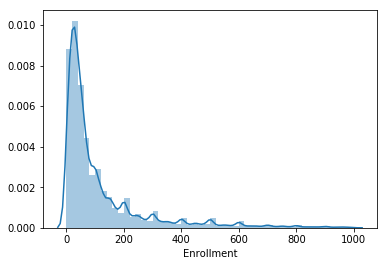

In [42]:
sns.distplot(x)

###### Feature Engineering for determining "Cancer Types"

In [43]:
#Here's the List of cancer sites
cancer_sites = [('breast', 'Breast'), ('lung', 'Lung'), ('colo', 'Colorectal'), ('prostate', 'Prostate'),
                ('pancrea', 'Pancreatic'), ('thyroid', 'Thyroid'), ('ovar', 'Ovarian'), ('melanoma', 'Melanoma'),
               ('esoph', 'Esophageal'), ('myeloma', 'Multiple Myeloma'), ('lymphoma', 'Lymphomas'),
                ('leukemia', 'Leukemias'), ('uter', 'Uterine'), ('bladder', 'Bladder'), ('cerv', 'Cervical'),
               ('head and neck', 'Head and Neck'), ('liver', 'Liver'), ('testi', 'Testicular')]
#Here's the List of cancer sites with multiple names
cancer_sites_mult_names = [(('brain', 'glio'), 'Brain'), (('kidney', 'renal'), 'Kidney'), (('stomach', 'gastric'), 'Gastric'),
                           (('bone', 'osteos'), 'Bone'), (('soft tissue', 'gastrointestinal stromal'), 'Soft-tissue')]

In [44]:
# Adding columns for cancer sites
for search_term, site in cancer_sites:
    train[site] = train.Conditions.str.contains(search_term, case=False)
    train[site] = train[site].map({True:1, False:0})
    
# Adding additional columns for cancer sites with multiple search terms
for search_terms, site in cancer_sites_mult_names:
    train[site] = ((train.Conditions.str.contains(search_terms[0], case=False)) | 
                     (train.Conditions.str.contains(search_terms[1], case=False)))
    train[site] = train[site].map({True:1, False:0})

"Cancer Sites" distribution

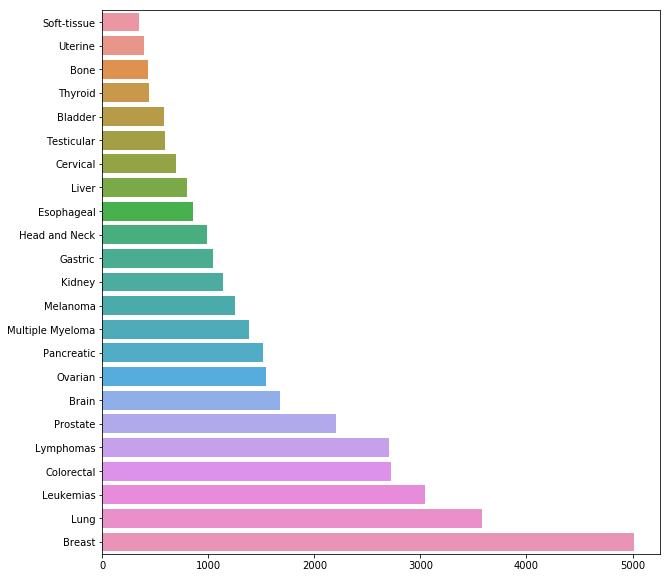

In [45]:
plt.figure(figsize=(10,10))
c=train.loc[:,'Breast':].sum().sort_values()
sns.barplot(c.values,c.index)

###### Most of the studies present in clinicaltrials.org are related to breast,lungs. 

## Correlation Analysis

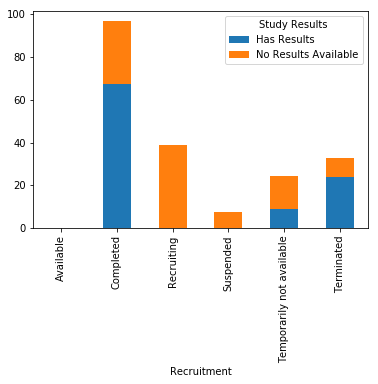

In [46]:
se=train['Study Results'].value_counts()
x=train.groupby(['Recruitment','Study Results']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for ph in x[i].index:
        
        x[i][ph]=(float(x[i][ph]))/float(se[ph])*100
x.unstack().plot(kind='bar',stacked=True)

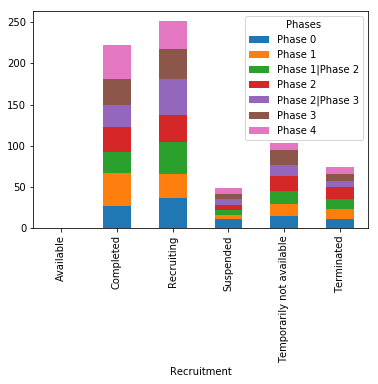

In [47]:
#train.groupby(['Recruitment','Phases']).size().unstack().plot(kind='bar',stacked=True)
se=train['Phases'].value_counts()
x=train.groupby(['Recruitment','Phases']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for ph in x[i].index:
        #print(x[i][ph],se[ph],x[i][ph]/se[ph]*100)
        x[i][ph]=(float(x[i][ph]))/float(se[ph])*100
x.unstack().plot(kind='bar',stacked=True)

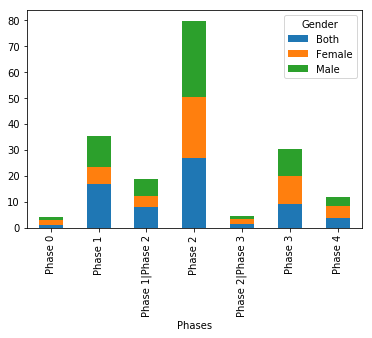

In [48]:
#train.groupby(['Phases','Gender']).size().unstack().plot(kind='bar',stacked=True)
se=train['Gender'].value_counts()
x=train.groupby(['Phases','Gender']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for ph in x[i].index:
        #print(x[i][ph],se[ph],x[i][ph]/se[ph]*100)
        x[i][ph]=(float(x[i][ph]))/float(se[ph])*100
x.unstack().plot(kind='bar',stacked=True)

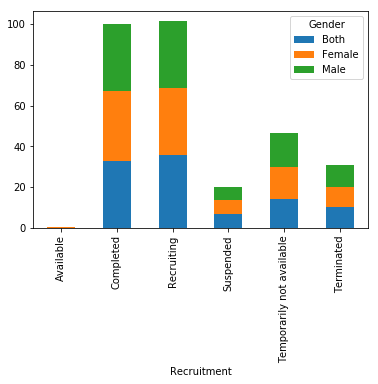

In [49]:
#train.groupby(['Recruitment','Gender']).size().unstack().plot(kind='bar',stacked=True)
se=train['Gender'].value_counts()
x=train.groupby(['Recruitment','Gender']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for ph in x[i].index:
        #print(x[i][ph],se[ph],x[i][ph]/se[ph]*100)
        x[i][ph]=(float(x[i][ph]))/float(se[ph])*100
x.unstack().plot(kind='bar',stacked=True)

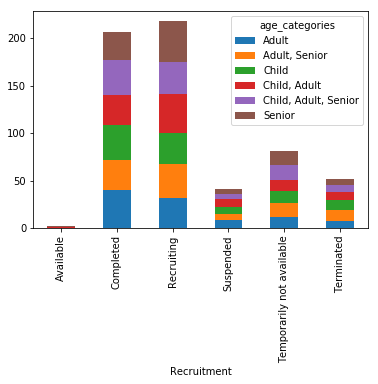

In [50]:
#train.groupby(['Recruitment','age_categories']).size().unstack().plot(kind='bar',stacked=True)
se=train['age_categories'].value_counts()
x=train.groupby(['Recruitment','age_categories']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for ph in x[i].index:
        #print(x[i][ph],se[ph],x[i][ph]/se[ph]*100)
        x[i][ph]=(float(x[i][ph]))/float(se[ph])*100
x.unstack().plot(kind='bar',stacked=True)

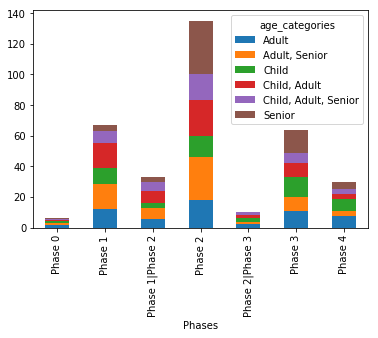

In [51]:
#train.groupby(['Phases','age_categories']).size().unstack().plot(kind='bar',stacked=True)
se=train['age_categories'].value_counts()
x=train.groupby(['Phases','age_categories']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for ph in x[i].index:
        #print(x[i][ph],se[ph],x[i][ph]/se[ph]*100)
        x[i][ph]=(float(x[i][ph]))/float(se[ph])*100
x.unstack().plot(kind='bar',stacked=True)

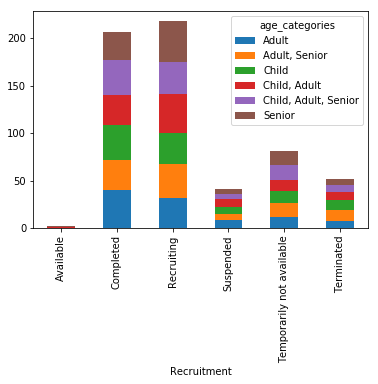

In [52]:
se=train['age_categories'].value_counts()
x=train.groupby(['Recruitment','age_categories']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for ph in x[i].index:
        x[i][ph]=(float(x[i][ph]))/float(se[ph])*100
x.unstack().plot(kind='bar',stacked=True)

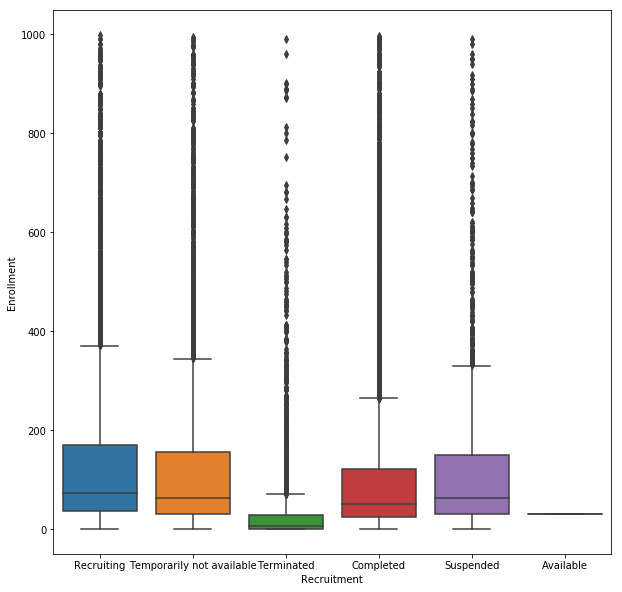

In [53]:
plt.figure(figsize=(10,10))
x=train[train['Enrollment']<1000]
sns.boxplot(x['Recruitment'],x['Enrollment'])